In [1]:
import tensorflow as tf
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt

In [83]:
#得到均值为u,标准差为stddev,大小为size 的高斯分布数组
def get_normal(u,stddev,size):
    nums = np.random.normal(u,stddev,size)
    
    #nums = [int(x) for x in nums]
    '''
    counter = sorted(Counter(nums).items(), key=lambda x:x[0])
    keys, possibles = [],[]
    for num, count in counter:
        keys.append(num)
        possibles.append(count/size)
    '''
    return nums #, keys, possibles
    #print(nums)
    
def mean(nums):
    return sum(nums)/len(nums)

    

In [292]:
nums_female = get_normal(155,8,300000)
nums_male = get_normal(180,8,200000)

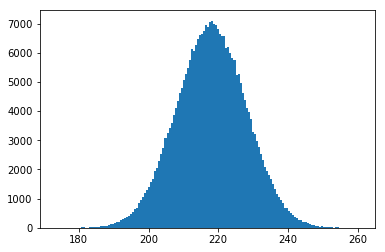

In [293]:
test_num = get_normal(218,10,300000)
plt.hist(test_num, 150)
plt.show()

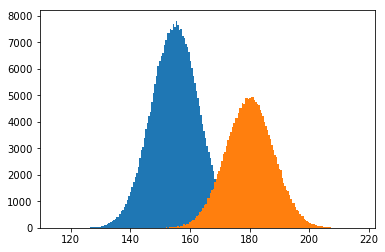

In [294]:
#plt.style.use('classic') 
plt.hist(nums_female, 150)
plt.hist(nums_male, 150)
plt.show()

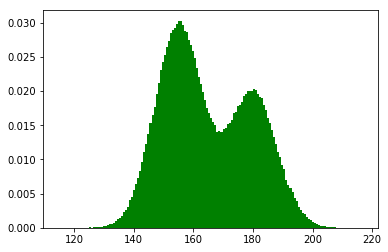

In [295]:
plt.hist(np.append(nums_male,nums_female), 150,normed=True,histtype='stepfilled',color='green')
plt.show()

In [296]:
def gauss(x, u, stddev):
    power = ((x-u)**2)/(2*stddev**2)
    y = (math.exp(-power))/(stddev*math.sqrt(2*math.pi))
    return y

def get_values(p, x, ug, stdg):
    yg = [p * gauss(x, ug, stdg) for x in list(xg)]
    return yg

In [297]:
def isSame(arga, argb):
    for i in range(len(arga)):
        if abs(arga[i] - argb[i]) > 0.01:
            return False
    return True

def run_EM(height):
    N = len(height)
    pg = 0.5
    pb = 0.5
    
    ug,stdg = min(height),4
    ub,stdb = max(height),4
    
    pre = [pg, pb, ug, stdg, ub, stdb]
    rb = list(range(N))
    rg = list(range(N))
    epoch = 0
    while epoch < 30:
        for i in range(N):
            nb = pb*gauss(height[i], ub, stdb)
            ng = pg*gauss(height[i], ug, stdg)
            rb[i] = nb/(nb + ng)
            rg[i] = ng/(nb + ng)

        Nb = sum(rb)  
        Ng = sum(rg)  
        
        #均值更新
        ub = sum([height[i]*rb[i] for i in range(len(height))])/Nb
        ug = sum([height[i]*rg[i] for i in range(len(height))])/Ng

        tmp_stdb, tmp_stdg = 0,0
        for i in range(N):
            tmp_stdb += rb[i]*((height[i]-ub)**2)
            tmp_stdg += rg[i]*((height[i]-ug)**2)
        #方差更新
        stdb = math.sqrt(tmp_stdb/Nb)
        stdg = math.sqrt(tmp_stdg/Ng)

        #占比更新
        pb = Nb/N
        pg = Ng/N

        now = [pg, pb, ug, stdg, ub, stdb]
        if isSame(pre, now) == True:
            break
        pre = now
        print('Iter ' + str(epoch))
        print('Female mean/stddev:\t' + str(ug) + "/" + str(stdg))
        print('Male mean/stddev:\t' + str(ub) + "/" + str(stdb))
        print('Female/Male:\t' + str(pg) + ' ' + str(pb) + ' ' + str(pg + pb) + '\n')
        epoch += 1
    return ug, stdg, ub, stdb, pg, pb

In [298]:
nums = np.append(nums_male,nums_female)
ug, stdg, ub, stdb, pg, pb = run_EM(nums)


Iter 0
Female mean/stddev:	153.822280775/6.904312911091691
Male mean/stddev:	179.263790276/7.889258702712056
Female/Male:	0.5608380779050632 0.4391619220949378 1.000000000000001

Iter 1
Female mean/stddev:	154.177082703/7.364258912925464
Male mean/stddev:	179.098981574/8.344152797250592
Female/Male:	0.565918297732156 0.43408170226783366 0.9999999999999896

Iter 2
Female mean/stddev:	154.336227019/7.539411005874529
Male mean/stddev:	179.089530259/8.470165850817876
Female/Male:	0.569390967089187 0.43060903291081154 0.9999999999999986

Iter 3
Female mean/stddev:	154.426235818/7.624184892260478
Male mean/stddev:	179.12757766/8.49383913539927
Female/Male:	0.5721290269006314 0.4278709730993684 0.9999999999999998

Iter 4
Female mean/stddev:	154.487168411/7.672928370942846
Male mean/stddev:	179.18157096/8.479759650530575
Female/Male:	0.574476258065423 0.42552374193456544 0.9999999999999885

Iter 5
Female mean/stddev:	154.534403371/7.705844041715757
Male mean/stddev:	179.239554219/8.45172410448

In [299]:
print(ug, stdg, ub, stdb, pg, pb)

154.954695358 7.959847526130546 179.885489267 8.056752456779211 0.5972640234532541 0.4027359765467319


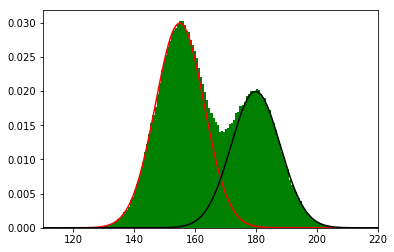

In [300]:

n, bins, patchs = plt.hist(np.append(nums_male,nums_female), 150,normed=True, color='green')
plt.xlim(110,220)
x = np.arange(110,220,0.1)
yg = get_values(pg, xg, ug, stdg)
yb = get_values(pb, x, ub, stdb)
plt.plot(x, yg, color='red')
plt.plot(x, yb, color='black')
plt.show()

[ 110.   110.1  110.2 ...,  219.7  219.8  219.9]
